# project 2

# Name: yousef mohamed elsharkawy

# Id: 18Q4486

In [25]:

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install kaggle

In [26]:
%cd gdrive/MyDrive/Datasets/fashionMnist2/

/content/gdrive/MyDrive/Datasets/fashionMnist2


In [27]:
ls

fashion-mnist_test.csv   kaggle.json             Train_data_modified.csv
fashion-mnist_train.csv  t10k-images-idx3-ubyte  train-images-idx3-ubyte
fashionmnist.zip         t10k-labels-idx1-ubyte  train-labels-idx1-ubyte


In [28]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Datasets/fashionMnist2/"

In [29]:
!kaggle datasets download -d zalando-research/fashionmnist

fashionmnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
!unzip fashionmnist.zip

Archive:  fashionmnist.zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## read the data

In [21]:
import pandas as pd

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [31]:
df = pd.read_csv('fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Describe the data 

In [32]:
df.shape

(60000, 785)

In [33]:
df.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [34]:
df.nunique()

label        10
pixel1        8
pixel2       17
pixel3       27
pixel4       65
           ... 
pixel780    251
pixel781    244
pixel782    233
pixel783    185
pixel784     65
Length: 785, dtype: int64

In [35]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


## Clean the Data 

### check for missing data 

In [36]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 785 columns):
 #    Column    Non-Null Count  Dtype
---   ------    --------------  -----
 0    label     60000 non-null  int64
 1    pixel1    60000 non-null  int64
 2    pixel2    60000 non-null  int64
 3    pixel3    60000 non-null  int64
 4    pixel4    60000 non-null  int64
 5    pixel5    60000 non-null  int64
 6    pixel6    60000 non-null  int64
 7    pixel7    60000 non-null  int64
 8    pixel8    60000 non-null  int64
 9    pixel9    60000 non-null  int64
 10   pixel10   60000 non-null  int64
 11   pixel11   60000 non-null  int64
 12   pixel12   60000 non-null  int64
 13   pixel13   60000 non-null  int64
 14   pixel14   60000 non-null  int64
 15   pixel15   60000 non-null  int64
 16   pixel16   60000 non-null  int64
 17   pixel17   60000 non-null  int64
 18   pixel18   60000 non-null  int64
 19   pixel19   60000 non-null  int64
 20   pixel20   60000 non-null  int64
 21   pixel21   

In [37]:
df.isnull().sum().sum()

0

In [38]:
df.isna().sum().sum()

0

### Detect duplicates 

In [39]:
df.duplicated().sum()

43

43 duplicates were found !, let's drop them

In [40]:
df.drop_duplicates(inplace=True)

In [41]:
df.duplicated().sum()

0

In [42]:
df.shape

(59957, 785)

In [43]:
# save the new data frame then load it again 
df.to_csv('Train_data_modified.csv',index=False)

In [44]:
df = pd.read_csv('Train_data_modified.csv')

In [45]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.shape

(59957, 785)

In [47]:
df.index

RangeIndex(start=0, stop=59957, step=1)

In [48]:
df.index.min(),df.index.max()

(0, 59956)

### visualize the data 

In [54]:
import matplotlib.pyplot as plt
import numpy as np

In [55]:
columns = []
for i,column in enumerate(df.columns):
    columns.append(column)

In [56]:
label = columns[0]
pixels = columns[1:]

In [57]:
def show_pixels_distributions(index = 0):
    image = np.array(df.loc[index][1:])
    label = str(df.loc[index][0])
    image = image.reshape(28,28)
    pixel_dist = image.sum(axis=0)
    x = range(28)
    plt.bar(x,pixel_dist)

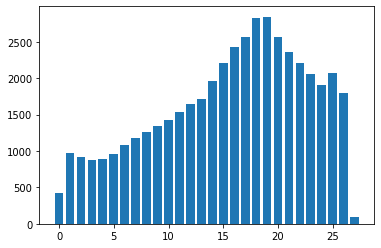

In [58]:
show_pixels_distributions(1)

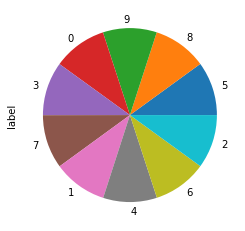

In [59]:
df[label].value_counts().plot(kind='pie')

In [60]:
def draw_pixel_hist(pixel_number = 1):
    pixel = "pixel" + str(pixel_number)
    df[pixel].hist();

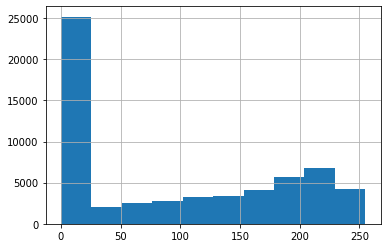

In [61]:
draw_pixel_hist(500)

In [62]:
def box_plot(pixel_number = 1):
    pixel = 'pixel'  + str(pixel_number)
    df[pixel].plot(kind='box')

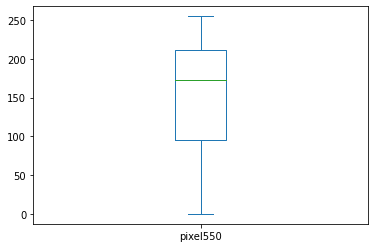

In [63]:
box_plot(550)

# Draw the data

In [64]:
classes = {'0':'T-shirt/top',
           '1':'Trouser',
           '2':'Pullover',
           '3':'Dress',
           '4':'Coat',
           '5':'Sandal',
           '6':'Shirt',
           '7':'Sneaker',
           '8':'Bag',
           '9':'Ankle boot'
          }

In [65]:
def draw(index = 0):
    image = np.array(df.loc[index][1:])
    label = str(df.loc[index][0])
    image = image.reshape(28,28)
    fig, (ax0) = plt.subplots(nrows=1,ncols=1,figsize=(2,2))
    ax0.imshow(image,cmap='gray',aspect='auto')
    plt.title(f"The image belong to a class: " + classes[label])

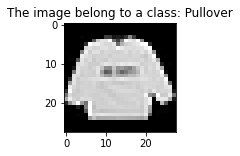

In [66]:
draw(0)

### carry out required correlation analysis

In [67]:
def show_label_to_pixel_correlation(pixel_number = 1):
    pixel = 'pixel' + str(pixel_number)
    df.plot(x=pixel,y=label,kind='scatter')

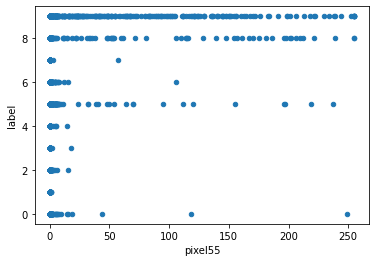

In [68]:
show_label_to_pixel_correlation(55)

## convert data to numpy arrays

In [69]:
Y = df['label']
Y = Y.to_numpy()
Y

array([2, 9, 6, ..., 8, 8, 7])

In [70]:
X = df[pixels]
X = X.to_numpy()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [71]:
X.shape,Y.shape

((59957, 784), (59957,))

## splitting the data 

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train , x_cv , y_train , y_cv = train_test_split(X,Y,test_size=0.2,random_state=42)

In [74]:
x_train.shape,y_train.shape

((47965, 784), (47965,))

In [75]:
x_cv.shape,y_cv.shape

((11992, 784), (11992,))

In [76]:
x_train[0].shape

(784,)

## preprocessing the data 

### wrape the input to be an image 

In [77]:
from tensorflow.keras.layers import Lambda,Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [78]:
m_train = x_train.shape[0]
m_cv = x_cv.shape[0]
x_train = x_train.reshape(m_train,28,28)
x_cv = x_cv.reshape(m_cv,28,28)

In [79]:
x_train.shape,x_cv.shape

((47965, 28, 28), (11992, 28, 28))

In [80]:
# Normalize and reshape the input images, we expand the shape to contain the axis for the number of channels (so that we have series of 3D images)
x_train = np.expand_dims(x_train.astype('float32'), -1) # -1 means that the new axis will be added to the last
x_cv = np.expand_dims(x_cv.astype('float32'), -1)

In [81]:
x_train.shape,x_cv.shape

((47965, 28, 28, 1), (11992, 28, 28, 1))

### normalize by dividing by the max

In [82]:
# normalize the values to be from 0 to 1
x_train /= 255
x_cv /= 255

## encode the labels

In [83]:
from keras.utils import np_utils

# convert the labels to one hot vectors  
y_train_encoded = np_utils.to_categorical(y_train, 10)
y_cv_encoded = np_utils.to_categorical(y_cv, 10)

In [84]:
y_train_encoded.shape,y_cv_encoded.shape

((47965, 10), (11992, 10))

## training the NN (LeNet-5)

In [ ]:
#define the hyper parameters
optimizers = ['sgd','adam','rmsprop']
dropouts = [0,0.5,0.8]
learning_rates = [1e-3,3e-3]
kernel_sizes = [3,5]
activations = ['relu','tanh']
batch_sizes = [32,2048,8192]

In [ ]:
2048*2*2

8192

In [ ]:
3*3*2*2*2*2

144

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
from keras.models import Sequential
from tensorflow import keras
import time

In [ ]:
int(time.time())

1672671213

In [ ]:
for optimizer in optimizers:
    for dropout in dropouts:
        for learning_rate in learning_rates:
            for kernel_size in kernel_sizes:
                for batch_size in batch_sizes:
                    for activation in activations:
                        NAME = f"optimizer {optimizer}- dropout {dropout}- learning rate {learning_rate}- kernel size {kernel_size}- stride {stride} batch size {batch_size} activation {activation}-{int(time.time())}" 
                        tensorboard = TensorBoard(log_dir="Logs\{}".format(NAME))
                        model = Sequential([
                            keras.layers.Conv2D(6, kernel_size=kernel_size, strides=1,  activation=activation, input_shape=x_train[0].shape, padding='same'), #C1
                            keras.layers.AveragePooling2D(), #S2
                            keras.layers.Conv2D(16, kernel_size=kernel_size, strides=1, activation=activation, padding='valid'), #C3
                            keras.layers.AveragePooling2D(), #S4
                            keras.layers.Conv2D(120, kernel_size=kernel_size, strides=1, activation=activation, padding='valid'), #C5
                            keras.layers.Flatten(), #Flatten
                            keras.layers.Dropout(dropout),
                            keras.layers.Dense(84, activation=activation), #F6
                            keras.layers.Dense(10, activation='softmax') #Output layer
                        ])
                        if optimizer == "sgd":
                            opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
                        elif optimizer == "adam":
                            opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
                        elif optimizer == 'rmsprop':
                            opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
                        model.compile(loss='CategoricalCrossentropy',optimizer=opt,metrics='accuracy')
                        model.fit(x_train,y_train_encoded,epochs = 20,batch_size = batch_size,callbacks=[tensorboard],validation_data=(x_cv,y_cv_encoded),verbose=2)

Streaming output truncated to the last 5000 lines.
Epoch 1/20
1499/1499 - 6s - loss: 0.5140 - accuracy: 0.8120 - val_loss: 0.4397 - val_accuracy: 0.8273 - 6s/epoch - 4ms/step
Epoch 2/20
1499/1499 - 5s - loss: 0.3888 - accuracy: 0.8585 - val_loss: 0.3885 - val_accuracy: 0.8571 - 5s/epoch - 3ms/step
Epoch 3/20
1499/1499 - 6s - loss: 0.3585 - accuracy: 0.8704 - val_loss: 0.4206 - val_accuracy: 0.8468 - 6s/epoch - 4ms/step
Epoch 4/20
1499/1499 - 6s - loss: 0.3402 - accuracy: 0.8777 - val_loss: 0.3609 - val_accuracy: 0.8680 - 6s/epoch - 4ms/step
Epoch 5/20
1499/1499 - 6s - loss: 0.3235 - accuracy: 0.8823 - val_loss: 0.4260 - val_accuracy: 0.8443 - 6s/epoch - 4ms/step
Epoch 6/20
1499/1499 - 6s - loss: 0.3107 - accuracy: 0.8854 - val_loss: 0.3617 - val_accuracy: 0.8680 - 6s/epoch - 4ms/step
Epoch 7/20
1499/1499 - 5s - loss: 0.3006 - accuracy: 0.8890 - val_loss: 0.3705 - val_accuracy: 0.8694 - 5s/epoch - 3ms/step
Epoch 8/20
1499/1499 - 5s - loss: 0.2933 - accuracy: 0.8934 - val_loss: 0.3466 - 

In [ ]:
! cd .

In [ ]:
%cd . ls

[Errno 2] No such file or directory: '. ls'
/content/gdrive/MyDrive/Datasets/fashionMnist


In [ ]:
%cd ..

/content/gdrive/MyDrive/Datasets


In [ ]:
!zip -r fashionMnistt.zip fashionMnist

  adding: fashionMnist/ (stored 0%)
  adding: fashionMnist/t10k-labels-idx1-ubyte (deflated 49%)
  adding: fashionMnist/Logs1\optimizer sgd- dropout 0- learning rate 0.001- kernel size 3- stride 1 batch size 32 activation relu-1672671964/ (stored 0%)
  adding: fashionMnist/Logs1\optimizer sgd- dropout 0- learning rate 0.001- kernel size 3- stride 1 batch size 32 activation relu-1672671964/train/ (stored 0%)
  adding: fashionMnist/Logs1\optimizer sgd- dropout 0- learning rate 0.001- kernel size 3- stride 1 batch size 32 activation relu-1672671964/train/events.out.tfevents.1672671965.ce8d0207b981.377.12.v2 (deflated 76%)
  adding: fashionMnist/Logs1\optimizer sgd- dropout 0- learning rate 0.001- kernel size 3- stride 1 batch size 32 activation relu-1672671964/validation/ (stored 0%)
  adding: fashionMnist/Logs1\optimizer sgd- dropout 0- learning rate 0.001- kernel size 3- stride 1 batch size 32 activation relu-1672671964/validation/events.out.tfevents.1672671970.ce8d0207b981.377.13.v2 (d

In [ ]:
files.download('fashionMnistt.zip')

In [ ]:
### the best model parameters are dropout = 0.5 kernel size 5 batch size 32 learning rate 0.001 activation tanh 

In [ ]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=20, min_lr=0.0001, min_delta = 0)

# we import the early stopping call back and tell it to monitor the accuracy of the validation set
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto', baseline=None, restore_best_weights=True)

model = Sequential([
                            keras.layers.Conv2D(6, kernel_size=3, strides=1,  activation='tanh', input_shape=x_train[0].shape, padding='same'), #C1
                            keras.layers.AveragePooling2D(), #S2
                            keras.layers.Conv2D(16, kernel_size=3, strides=1, activation='tanh', padding='valid'), #C3
                            keras.layers.AveragePooling2D(), #S4
                            keras.layers.Conv2D(120, kernel_size=3, strides=1, activation='tanh', padding='valid'), #C5
                            keras.layers.Flatten(), #Flatten
                            keras.layers.Dropout(0.5),
                            keras.layers.Dense(84, activation='tanh'), #F6
                            keras.layers.Dense(10, activation='softmax') #Output layer
                        ])
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='CategoricalCrossentropy',optimizer=opt,metrics='accuracy')


In [ ]:
history = model.fit(x_train,y_train_encoded,epochs = 50,batch_size = 32,callbacks=[early_stop],validation_data=(x_cv,y_cv_encoded),verbose=2)

Epoch 1/50
1499/1499 - 7s - loss: 0.5815 - accuracy: 0.7857 - val_loss: 0.4487 - val_accuracy: 0.8333 - 7s/epoch - 5ms/step
Epoch 2/50
1499/1499 - 6s - loss: 0.4241 - accuracy: 0.8467 - val_loss: 0.3935 - val_accuracy: 0.8552 - 6s/epoch - 4ms/step
Epoch 3/50
1499/1499 - 6s - loss: 0.3882 - accuracy: 0.8590 - val_loss: 0.3710 - val_accuracy: 0.8612 - 6s/epoch - 4ms/step
Epoch 4/50
1499/1499 - 6s - loss: 0.3684 - accuracy: 0.8665 - val_loss: 0.3660 - val_accuracy: 0.8643 - 6s/epoch - 4ms/step
Epoch 5/50
1499/1499 - 6s - loss: 0.3536 - accuracy: 0.8708 - val_loss: 0.3519 - val_accuracy: 0.8683 - 6s/epoch - 4ms/step
Epoch 6/50
1499/1499 - 7s - loss: 0.3421 - accuracy: 0.8758 - val_loss: 0.3375 - val_accuracy: 0.8749 - 7s/epoch - 5ms/step
Epoch 7/50
1499/1499 - 6s - loss: 0.3302 - accuracy: 0.8789 - val_loss: 0.3278 - val_accuracy: 0.8783 - 6s/epoch - 4ms/step
Epoch 8/50
1499/1499 - 6s - loss: 0.3251 - accuracy: 0.8809 - val_loss: 0.3344 - val_accuracy: 0.8769 - 6s/epoch - 4ms/step
Epoch 9/

## results 


In [106]:
df_test = pd.read_csv('fashion-mnist_test.csv')

In [107]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df_test.shape

(10000, 785)

In [111]:
Y_test = df_test['label']
Y_test = Y_test.to_numpy()
Y_test

array([0, 1, 2, ..., 8, 8, 1])

In [112]:
X_test = df_test[pixels]
X_test = X_test.to_numpy()
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 3, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [113]:
X_test.shape,Y_test.shape

((10000, 784), (10000,))

In [114]:
m_test = X_test.shape[0]
x_test = X_test.reshape(m_test,28,28)

In [115]:
x_test.shape

(10000, 28, 28)

In [116]:
x_test = np.expand_dims(x_test.astype('float32'), -1) 

In [117]:
x_test.shape

(10000, 28, 28, 1)

In [118]:
x_test /= 255

In [121]:
from keras.utils import np_utils

y_test_encoded = np_utils.to_categorical(Y_test, 10)

In [122]:
y_test_encoded.shape

(10000, 10)

In [123]:
model.evaluate(x_test,y_test_encoded)

313/313 [==============================] - 1s 4ms/step - loss: 0.2979 - accuracy: 0.8911


[0.297888845205307, 0.8910999894142151]

# comment 
- we see that the accuracy of the LeNet5 model is barely overcoming 90%
- when grid search was used, it turned out there were modifications that led to better performance (like using relu instead of tanh)
